In [2]:
# exercise 10_1_5

import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.cluster import k_means
import pandas as pd



In [3]:
data = pd.read_csv('data.csv')
prices = data[['date','price_GER']]

In [4]:
# create a df with one column for each hour and one row for each day
prices_copy = prices.copy()
prices_copy['hour'] = prices_copy['date'].str.extract('(\d+):').astype(int)
prices_copy['day'] = prices_copy['date'].str.extract('(\d+-\d+-\d+)')
prices_tab = prices_copy.pivot(index='day', columns='hour', values='price_GER')
prices_tab



hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
2019-01-01,28.3200,10.0700,-4.0800,-9.9100,-7.4100,-12.5500,-17.2500,-15.0700,-4.9300,-6.3300,...,0.0000,-0.0300,1.9700,9.0600,0.0700,-4.9700,-6.9800,-24.9300,-4.8700,-28.9300
2019-01-02,-33.5700,-45.9200,-48.2900,-44.9900,-48.9300,-29.9100,-0.0100,37.4300,48.0600,50.7400,...,49.6400,53.6700,56.0100,56.9500,62.0800,62.1100,57.9900,55.6400,55.1300,50.7600
2019-01-03,42.9100,45.2200,45.6300,44.0000,43.8800,45.9200,51.0700,52.7700,62.8900,60.0300,...,65.2400,67.7600,68.4100,69.5500,67.2800,69.4600,68.3800,61.7200,53.7200,49.9800
2019-01-04,50.7300,47.1100,47.0700,46.9400,47.0000,46.9100,49.5900,55.3200,55.7800,55.5200,...,51.4100,51.6900,52.5900,54.6600,54.1000,51.8900,46.5800,45.4300,43.9600,31.4100
2019-01-05,26.9000,25.1200,24.1200,22.0400,18.3700,22.0900,23.3500,28.7600,36.6300,40.4600,...,51.9200,53.2200,56.6200,56.9200,61.6400,59.4400,52.7500,51.9000,51.3800,49.9600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,33.0725,33.0675,31.7550,31.5875,30.4300,43.7900,59.9100,89.0025,88.7175,88.9775,...,62.7150,62.7925,75.0175,87.6775,86.2675,70.7775,61.2700,56.3100,50.4100,37.0400
2023-12-28,1.8875,0.3825,0.2825,-0.9175,-0.7425,0.6700,4.3225,25.7675,33.8075,36.7600,...,32.0800,41.7325,45.7100,64.0825,59.4825,52.2175,29.9075,20.5400,16.8000,3.2225
2023-12-29,-5.0475,-7.5475,-7.2400,-8.3450,-8.4475,-7.2175,-6.5350,1.4950,9.1875,10.0025,...,1.5450,9.8575,17.3125,33.2650,34.4875,26.9725,18.2500,12.3675,11.0025,5.8400


In [5]:
# drop the rows with missing values
prices_tab = prices_tab.dropna()
prices_tab

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
2019-01-01,28.3200,10.0700,-4.0800,-9.9100,-7.4100,-12.5500,-17.2500,-15.0700,-4.9300,-6.3300,...,0.0000,-0.0300,1.9700,9.0600,0.0700,-4.9700,-6.9800,-24.9300,-4.8700,-28.9300
2019-01-02,-33.5700,-45.9200,-48.2900,-44.9900,-48.9300,-29.9100,-0.0100,37.4300,48.0600,50.7400,...,49.6400,53.6700,56.0100,56.9500,62.0800,62.1100,57.9900,55.6400,55.1300,50.7600
2019-01-03,42.9100,45.2200,45.6300,44.0000,43.8800,45.9200,51.0700,52.7700,62.8900,60.0300,...,65.2400,67.7600,68.4100,69.5500,67.2800,69.4600,68.3800,61.7200,53.7200,49.9800
2019-01-04,50.7300,47.1100,47.0700,46.9400,47.0000,46.9100,49.5900,55.3200,55.7800,55.5200,...,51.4100,51.6900,52.5900,54.6600,54.1000,51.8900,46.5800,45.4300,43.9600,31.4100
2019-01-05,26.9000,25.1200,24.1200,22.0400,18.3700,22.0900,23.3500,28.7600,36.6300,40.4600,...,51.9200,53.2200,56.6200,56.9200,61.6400,59.4400,52.7500,51.9000,51.3800,49.9600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,5.2150,0.2050,-4.6000,-4.5000,-3.0150,-4.5300,-2.6725,6.9400,3.7850,3.3200,...,0.6875,8.1875,44.4850,51.5450,51.8625,51.7900,51.9425,51.7425,51.7025,49.2800
2023-12-27,33.0725,33.0675,31.7550,31.5875,30.4300,43.7900,59.9100,89.0025,88.7175,88.9775,...,62.7150,62.7925,75.0175,87.6775,86.2675,70.7775,61.2700,56.3100,50.4100,37.0400
2023-12-28,1.8875,0.3825,0.2825,-0.9175,-0.7425,0.6700,4.3225,25.7675,33.8075,36.7600,...,32.0800,41.7325,45.7100,64.0825,59.4825,52.2175,29.9075,20.5400,16.8000,3.2225


In [6]:
# Make sure that each rows has a mean of 0 and a standard deviation of 1
prices_tab = prices_tab.apply(lambda x: (x - x.mean()) / x.std(), axis=1)
prices_tab

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
2019-01-01,2.835846,1.249126,0.018874,-0.488007,-0.270648,-0.717538,-1.126173,-0.936636,-0.055028,-0.176749,...,0.373604,0.370995,0.544883,1.161313,0.379690,-0.058506,-0.233262,-1.793900,-0.049811,-2.141674
2019-01-02,-1.418533,-1.713030,-1.769545,-1.690853,-1.784806,-1.331257,-0.618265,0.274526,0.528008,0.591915,...,0.565684,0.661783,0.717583,0.739998,0.862328,0.863043,0.764798,0.708760,0.696598,0.592392
2019-01-03,-1.550323,-1.308449,-1.265519,-1.436192,-1.448757,-1.235154,-0.695911,-0.517909,0.541730,0.242267,...,0.787792,1.051654,1.119714,1.239081,1.001395,1.229657,1.116573,0.419222,-0.418437,-0.810042
2019-01-04,0.154060,-0.526058,-0.533573,-0.557997,-0.546724,-0.563633,-0.060121,1.016418,1.102842,1.053994,...,0.281817,0.334422,0.503512,0.892419,0.787208,0.371998,-0.625633,-0.841692,-1.117872,-3.475738
2019-01-05,-1.067491,-1.191839,-1.261697,-1.407002,-1.663381,-1.403509,-1.315488,-0.937555,-0.387771,-0.120214,...,0.680360,0.771176,1.008694,1.029651,1.359382,1.205694,0.738343,0.678963,0.642637,0.543438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,-0.480957,-0.685443,-0.881562,-0.877480,-0.816869,-0.878705,-0.802890,-0.410550,-0.539323,-0.558302,...,-0.665749,-0.359632,1.121872,1.410030,1.422989,1.420030,1.426255,1.418092,1.416459,1.317583
2023-12-27,-1.330084,-1.330324,-1.393328,-1.401369,-1.456932,-0.815609,-0.041798,1.354735,1.341055,1.353535,...,0.092851,0.096571,0.683411,1.291131,1.223447,0.479877,0.023487,-0.214609,-0.497828,-1.139631
2023-12-28,-1.115823,-1.191237,-1.196248,-1.256379,-1.247610,-1.176831,-0.993808,0.080780,0.483656,0.631603,...,0.397093,0.880770,1.080079,2.000707,1.770205,1.406163,0.288231,-0.181165,-0.368573,-1.048928


<Figure size 640x480 with 0 Axes>

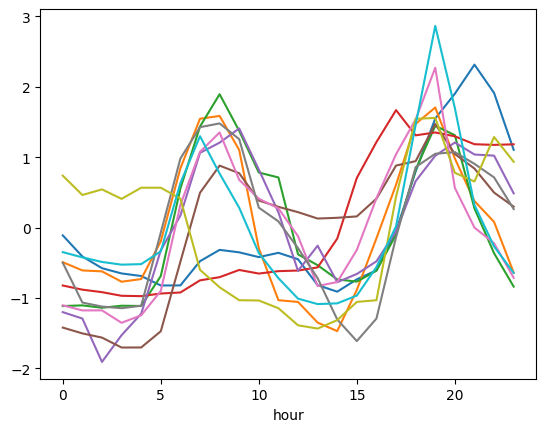

In [7]:
# plot the data for 10 random rows
plt.figure()
prices_tab.sample(10).T.plot(legend=False)
plt.show()



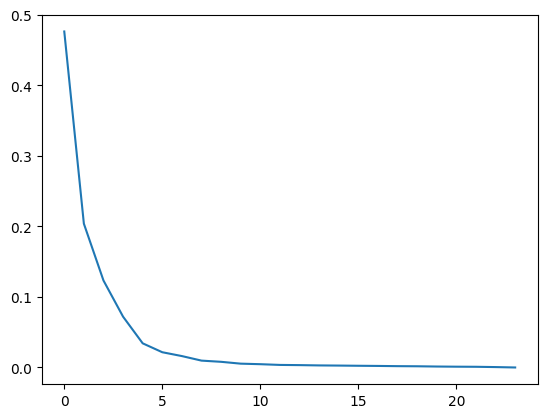

[0.47628318 0.20383066 0.12329441]


In [8]:
# do a PCA on the data
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(prices_tab)
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

# Print the explained variance of the first 3 components
print(pca.explained_variance_ratio_[:3])


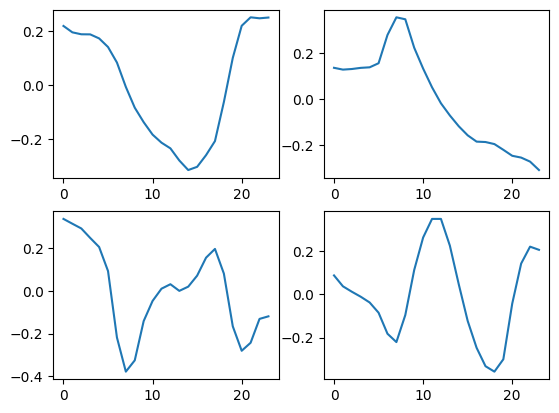

In [9]:
# do subplots with PC1, PC2, PC3 and PC4
fig, axes = plt.subplots(2, 2)
for i, ax in enumerate(axes.flat):
    ax.plot(pca.components_[i])
plt.show()



In [10]:
# Do PCA with 4 components
pca = PCA(n_components=4)
X = pca.fit_transform(prices_tab)

# select only the two first columns of X
X1 = X[:, :2]

# select only the two last columns of X
X2 = X[:, 2:]



<Figure size 640x480 with 0 Axes>

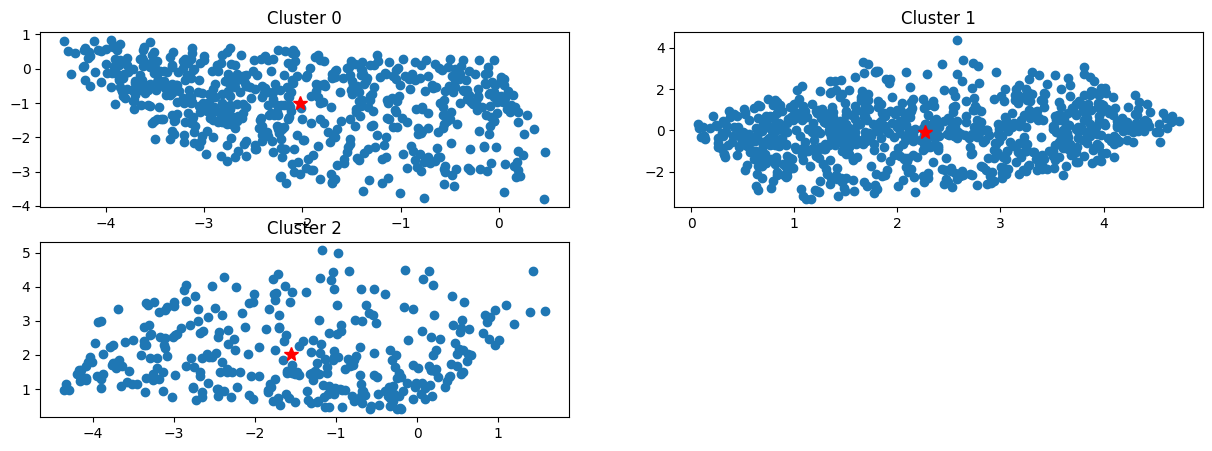

In [11]:
# Most of the explained variance is in the first and second component, so we can do a clustering only using PC1 and PC2
# Let's do a k-means clustering with a given number of cluster
from sklearn.cluster import KMeans

# Number of clusters:
K = 3

# Number of repetitions with different initial centroid seeds
S = 5

# Run k-means clustering:
centroids1, cls1, inertia1 = k_means(X1, K, verbose=False, max_iter=100, n_init=S)

# Plot results:

# Plot centroids
plt.figure(1)
plt.figure(figsize=(15,5))
n1 = int(np.ceil(np.sqrt(K/2)))
n2 = int(np.ceil(float(K)/n1))
for k in range(K):
    plt.subplot(n1,n2,k+1)
    plt.plot(centroids1[k,0], centroids1[k,1], 'r*', markersize=10)
    plt.scatter(X1[cls1==k,0], X1[cls1==k,1])
    plt.title('Cluster %d' % k)
plt.show()



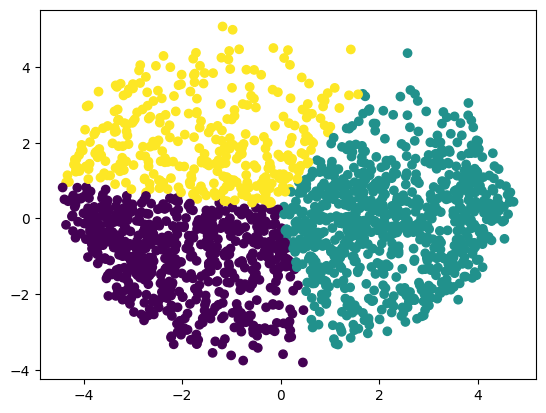

In [12]:
# Let's plot the data with the cluster color
plt.figure()
plt.scatter(X1[:,0], X1[:,1], c=cls1)
plt.show()


<Figure size 640x480 with 0 Axes>

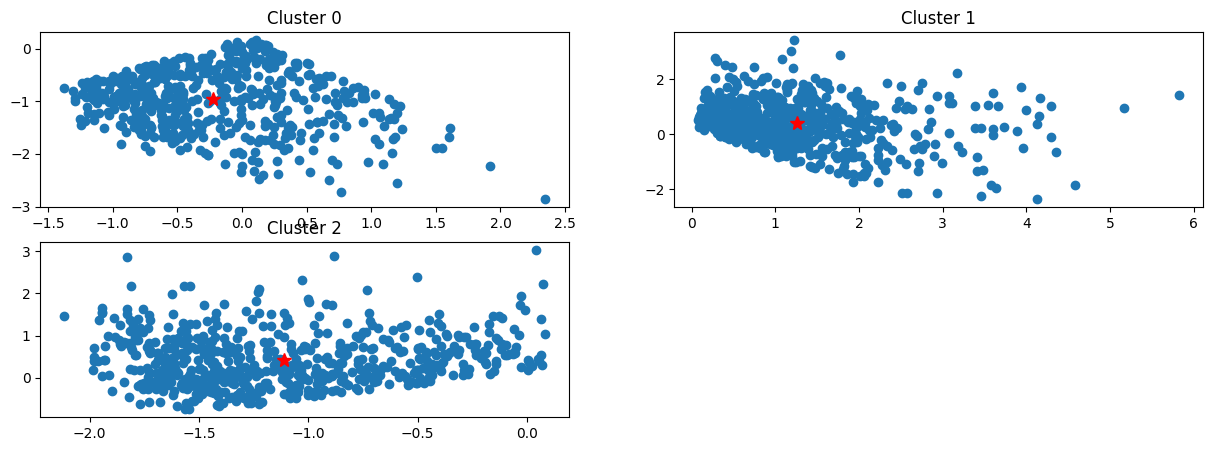

In [13]:
# Most of the explained variance is in the first and second component, so we can do a clustering only using PC1 and PC2
# Let's do a k-means clustering with a given number of cluster
from sklearn.cluster import KMeans

# Number of clusters:
K = 3

# Number of repetitions with different initial centroid seeds
S = 5

# Run k-means clustering:
centroids2, cls2, inertia2 = k_means(X2, K, verbose=False, max_iter=100, n_init=S)

# Plot results:

# Plot centroids
plt.figure(1)
plt.figure(figsize=(15,5))
n1 = int(np.ceil(np.sqrt(K/2)))
n2 = int(np.ceil(float(K)/n1))
for k in range(K):
    plt.subplot(n1,n2,k+1)
    plt.plot(centroids2[k,0], centroids2[k,1], 'r*', markersize=10)
    plt.scatter(X2[cls2==k,0], X2[cls2==k,1])
    plt.title('Cluster %d' % k)
plt.show()



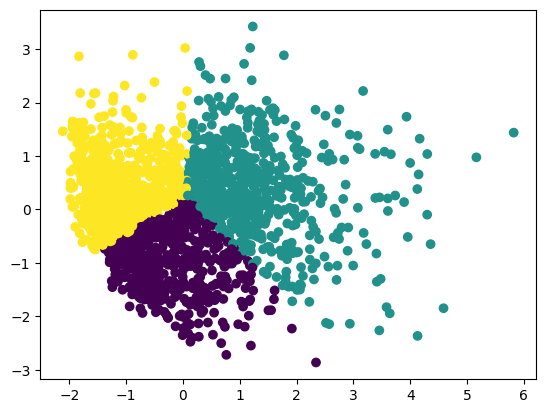

In [14]:
# Let's plot the data with the cluster color
plt.figure()
plt.scatter(X2[:,0], X2[:,1], c=cls2)
plt.show()


In [15]:
# Recreate the centroids doing combinations of the centroids of the two PCA
centroids = np.zeros((K*K, 4))
for k1 in range(K):
    for k2 in range(K):
        centroids[k1+k2*K, :] = np.hstack((centroids1[k1], centroids2[k2]))
centroids

array([[-2.0226371 , -0.99371986, -0.22466582, -0.9543981 ],
       [ 2.27042514, -0.08275293, -0.22466582, -0.9543981 ],
       [-1.56095375,  2.01851086, -0.22466582, -0.9543981 ],
       [-2.0226371 , -0.99371986,  1.26360776,  0.39791595],
       [ 2.27042514, -0.08275293,  1.26360776,  0.39791595],
       [-1.56095375,  2.01851086,  1.26360776,  0.39791595],
       [-2.0226371 , -0.99371986, -1.10921422,  0.4287779 ],
       [ 2.27042514, -0.08275293, -1.10921422,  0.4287779 ],
       [-1.56095375,  2.01851086, -1.10921422,  0.4287779 ]])

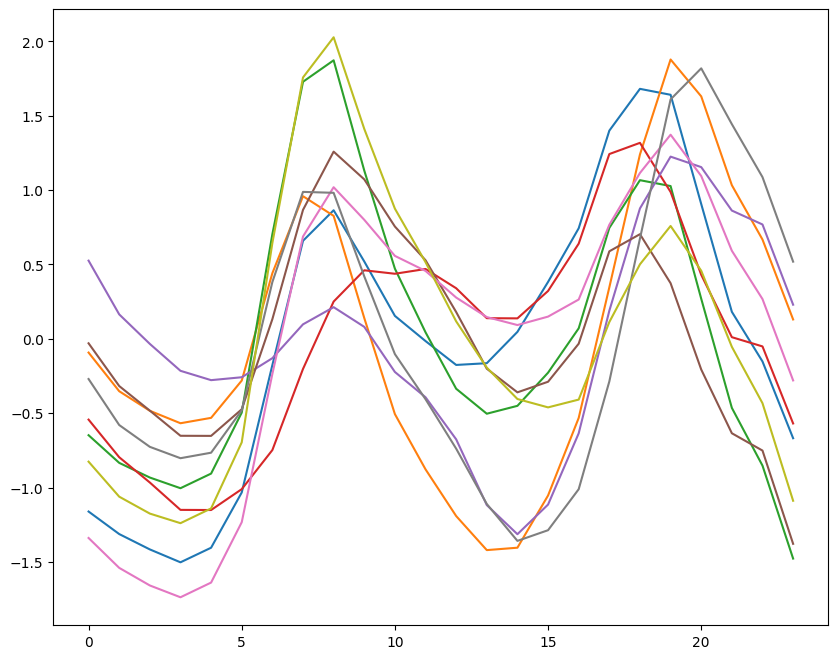

In [16]:
# Let's plot the centroids in the original space of the data
centroids = pca.inverse_transform(centroids)
plt.figure(figsize=(10, 8))
plt.plot(centroids.T)
plt.show()



In [17]:
# create a CSV file with the centroids in the original space, with hours as rows and clusters as columns
df = pd.DataFrame(centroids.T, columns=['Cluster %d' % k for k in range(K)])
df.to_csv('plans.csv', index=False)

ValueError: Shape of passed values is (24, 9), indices imply (24, 3)